In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [129]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [130]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [131]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
               pd.DataFrame(linnerud.target, columns=linnerud.target_names)], axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


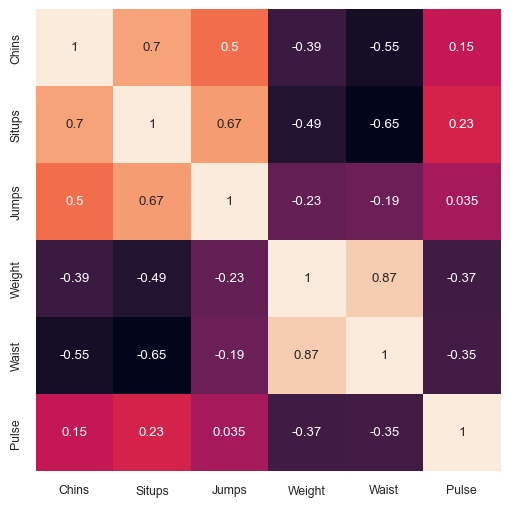

In [132]:
df_corr = df.corr()

plt.figure(figsize=(6, 6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [133]:
# too low correlation between Jumps and Pulse

X = df
X = X.drop(columns=['Jumps','Pulse'], axis=1)

y = df['Pulse']

In [134]:
X

,Chins,Situps,Weight,Waist
0,5.0,162.0,191.0,36.0
1,2.0,110.0,189.0,37.0
2,12.0,101.0,193.0,38.0
3,12.0,105.0,162.0,35.0
4,13.0,155.0,189.0,35.0
5,4.0,101.0,182.0,36.0
6,8.0,101.0,211.0,38.0
7,6.0,125.0,167.0,34.0
8,15.0,200.0,176.0,31.0
9,17.0,251.0,154.0,33.0


In [135]:
y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

def showGraph(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [137]:
#Conv1D Model

from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.optimizers import Adam    

def buildModel():
    model = Sequential()

    model.add(Conv1D(4,3, activation="relu", input_shape=(4,1)))
    model.add(Flatten())
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    model.compile(Adam(learning_rate=0.02), loss = 'mse', metrics = ['mae'])
    return model

model = buildModel()
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_46 (Conv1D)          (None, 2, 4)              16        
                                                                 
 flatten_46 (Flatten)        (None, 8)                 0         
                                                                 
 dense_95 (Dense)            (None, 8)                 72        
                                                                 
 dense_96 (Dense)            (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
# To prevent cheating, standardize after dividing full dataset into train, val, test dataset
def standardize(train, val, test):
    
    train_mean = np.mean(train, axis = 0)
    train_std = np.std(train, axis = 0)

    X_train = (train - train_mean) / train_std
    X_val = (val - train_mean) / train_std
    X_test = (test - train_mean) / train_std
    
    return [X_train, X_val, X_test]

In [139]:
# change dataframe into numpy narray

X = X.values
y = y.values


[1th Fold progress]
Epoch 1/100
3/3 [==============================] - 1s 116ms/step - loss: 3210.6230 - mae: 56.3224 - val_loss: 3385.2319 - val_mae: 57.2795
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 3187.6780 - mae: 56.1197 - val_loss: 3342.6975 - val_mae: 56.9140
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 3158.8740 - mae: 55.8688 - val_loss: 3285.5818 - val_mae: 56.4182
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 3116.2922 - mae: 55.4887 - val_loss: 3201.6758 - val_mae: 55.6842
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 3056.5637 - mae: 54.9395 - val_loss: 3083.1060 - val_mae: 54.6302
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 2966.7354 - mae: 54.1277 - val_loss: 2918.5898 - val_mae: 53.1292
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 2836.9941 - mae: 52.9093 - val_loss: 2702.0420 - val_mae: 51.0809
Epoch 8/100


3/3 [==============================] - 0s 24ms/step - loss: 28.7982 - mae: 4.7118 - val_loss: 98.5242 - val_mae: 9.6379
Epoch 62/100
3/3 [==============================] - 0s 25ms/step - loss: 27.6650 - mae: 4.6602 - val_loss: 96.5198 - val_mae: 9.4536
Epoch 63/100
3/3 [==============================] - 0s 20ms/step - loss: 27.1436 - mae: 4.6646 - val_loss: 95.2352 - val_mae: 9.3257
Epoch 64/100
3/3 [==============================] - 0s 20ms/step - loss: 27.1125 - mae: 4.6869 - val_loss: 95.4385 - val_mae: 9.3443
Epoch 65/100
3/3 [==============================] - 0s 19ms/step - loss: 26.5929 - mae: 4.6180 - val_loss: 94.6377 - val_mae: 9.2679
Epoch 66/100
3/3 [==============================] - 0s 36ms/step - loss: 26.6761 - mae: 4.6246 - val_loss: 94.7393 - val_mae: 9.2997
Epoch 67/100
3/3 [==============================] - 0s 25ms/step - loss: 26.2185 - mae: 4.5634 - val_loss: 95.1727 - val_mae: 9.3403
Epoch 68/100
3/3 [==============================] - 0s 20ms/step - loss: 26.3616 -

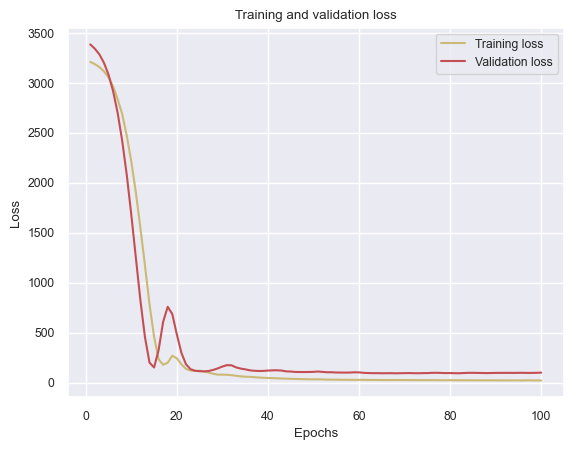

1/1 [==============================] - 0s 192ms/step - loss: 34.3804 - mae: 5.3183

[2th Fold progress]
Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 3225.1042 - mae: 56.4062 - val_loss: 2591.8726 - val_mae: 50.8996
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 3164.0752 - mae: 55.8591 - val_loss: 2549.6938 - val_mae: 50.4858
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 3106.9514 - mae: 55.3306 - val_loss: 2509.8337 - val_mae: 50.0906
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 3056.6543 - mae: 54.8595 - val_loss: 2467.2893 - val_mae: 49.6637
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 2992.0579 - mae: 54.2582 - val_loss: 2411.1873 - val_mae: 49.0935
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 2916.5977 - mae: 53.5043 - val_loss: 2340.4248 - val_mae: 48.3627
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - l

3/3 [==============================] - 0s 23ms/step - loss: 40.8595 - mae: 5.8485 - val_loss: 37.4689 - val_mae: 5.8253
Epoch 62/100
3/3 [==============================] - 0s 22ms/step - loss: 38.7555 - mae: 5.6899 - val_loss: 33.3105 - val_mae: 5.4833
Epoch 63/100
3/3 [==============================] - 0s 23ms/step - loss: 38.0875 - mae: 5.6406 - val_loss: 30.4232 - val_mae: 5.2436
Epoch 64/100
3/3 [==============================] - 0s 22ms/step - loss: 37.3480 - mae: 5.5892 - val_loss: 30.9284 - val_mae: 5.2900
Epoch 65/100
3/3 [==============================] - 0s 20ms/step - loss: 37.1000 - mae: 5.5517 - val_loss: 27.4611 - val_mae: 4.9806
Epoch 66/100
3/3 [==============================] - 0s 21ms/step - loss: 36.2331 - mae: 5.4582 - val_loss: 27.0641 - val_mae: 4.9447
Epoch 67/100
3/3 [==============================] - 0s 21ms/step - loss: 35.7492 - mae: 5.4220 - val_loss: 28.1091 - val_mae: 5.0605
Epoch 68/100
3/3 [==============================] - 0s 21ms/step - loss: 34.8653 -

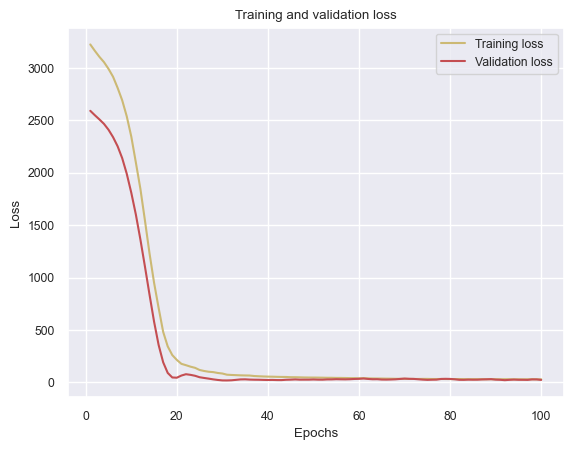

1/1 [==============================] - 0s 171ms/step - loss: 79.3154 - mae: 6.9800

[3th Fold progress]
Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 3504.5569 - mae: 58.7394 - val_loss: 2453.8389 - val_mae: 49.4836
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 3465.4724 - mae: 58.4020 - val_loss: 2404.0586 - val_mae: 48.9842
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 3422.0715 - mae: 58.0424 - val_loss: 2338.4199 - val_mae: 48.3178
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 3354.4219 - mae: 57.4831 - val_loss: 2252.0996 - val_mae: 47.4256
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 3281.0344 - mae: 56.8585 - val_loss: 2131.4568 - val_mae: 46.1446
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 3183.0508 - mae: 55.9876 - val_loss: 1974.6311 - val_mae: 44.4135
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - l

3/3 [==============================] - 0s 22ms/step - loss: 26.9019 - mae: 4.1902 - val_loss: 147.9413 - val_mae: 10.9670
Epoch 61/100
3/3 [==============================] - 0s 24ms/step - loss: 26.6692 - mae: 4.1819 - val_loss: 147.0212 - val_mae: 10.9586
Epoch 62/100
3/3 [==============================] - 0s 24ms/step - loss: 26.3240 - mae: 4.1767 - val_loss: 148.0743 - val_mae: 11.0362
Epoch 63/100
3/3 [==============================] - 0s 22ms/step - loss: 26.8383 - mae: 4.1980 - val_loss: 157.4566 - val_mae: 11.4290
Epoch 64/100
3/3 [==============================] - 0s 20ms/step - loss: 26.3503 - mae: 4.1157 - val_loss: 159.4265 - val_mae: 11.5394
Epoch 65/100
3/3 [==============================] - 0s 21ms/step - loss: 25.7405 - mae: 4.0338 - val_loss: 149.6355 - val_mae: 11.1433
Epoch 66/100
3/3 [==============================] - 0s 21ms/step - loss: 25.3884 - mae: 4.0753 - val_loss: 139.2710 - val_mae: 10.7181
Epoch 67/100
3/3 [==============================] - 0s 20ms/step - l

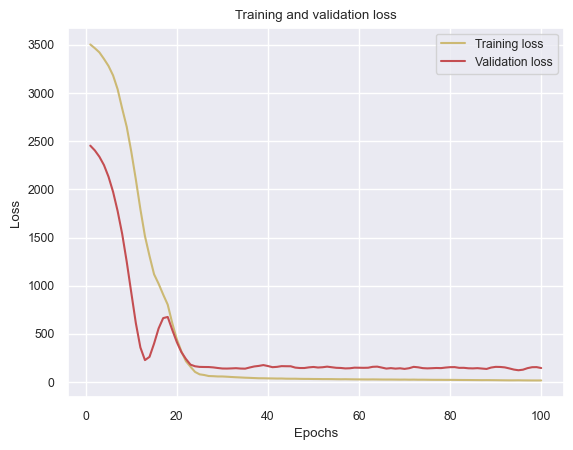

1/1 [==============================] - 0s 165ms/step - loss: 319.5446 - mae: 12.7070

[4th Fold progress]
Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 3057.5325 - mae: 54.8889 - val_loss: 3211.8743 - val_mae: 56.4357
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 3009.5457 - mae: 54.4489 - val_loss: 3134.6633 - val_mae: 55.7485
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 2943.7703 - mae: 53.8733 - val_loss: 3035.6873 - val_mae: 54.8535
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 2866.5872 - mae: 53.1462 - val_loss: 2904.6448 - val_mae: 53.6403
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 2759.0710 - mae: 52.0981 - val_loss: 2735.8347 - val_mae: 52.0266
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 2604.3921 - mae: 50.6279 - val_loss: 2521.3765 - val_mae: 49.8959
Epoch 7/100
3/3 [==============================] - 0s 20ms/step -

3/3 [==============================] - 0s 22ms/step - loss: 37.3727 - mae: 5.4549 - val_loss: 30.7984 - val_mae: 4.8505
Epoch 62/100
3/3 [==============================] - 0s 23ms/step - loss: 36.5891 - mae: 5.3508 - val_loss: 32.2837 - val_mae: 4.8398
Epoch 63/100
3/3 [==============================] - 0s 24ms/step - loss: 36.8164 - mae: 5.4226 - val_loss: 32.7884 - val_mae: 4.8146
Epoch 64/100
3/3 [==============================] - 0s 21ms/step - loss: 36.6841 - mae: 5.3702 - val_loss: 31.8439 - val_mae: 4.7908
Epoch 65/100
3/3 [==============================] - 0s 22ms/step - loss: 35.6530 - mae: 5.2779 - val_loss: 33.3465 - val_mae: 4.7939
Epoch 66/100
3/3 [==============================] - 0s 24ms/step - loss: 35.0220 - mae: 5.2363 - val_loss: 35.1821 - val_mae: 4.7928
Epoch 67/100
3/3 [==============================] - 0s 21ms/step - loss: 34.7936 - mae: 5.2358 - val_loss: 35.2190 - val_mae: 4.8673
Epoch 68/100
3/3 [==============================] - 0s 22ms/step - loss: 33.9273 -

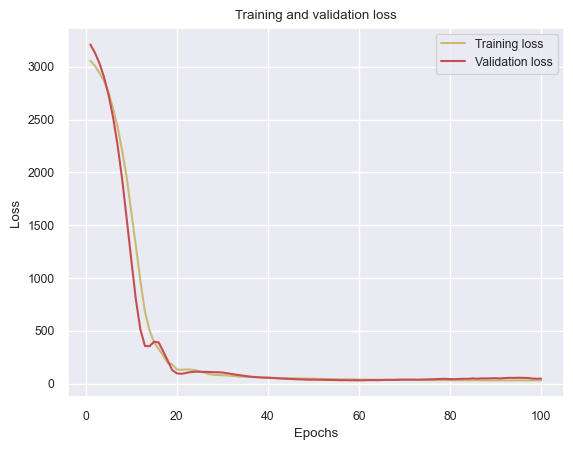

1/1 [==============================] - 0s 167ms/step - loss: 66.5242 - mae: 7.5263

[5th Fold progress]
Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 3229.4490 - mae: 56.4935 - val_loss: 3315.3667 - val_mae: 56.6568
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 3149.7546 - mae: 55.7839 - val_loss: 3194.6616 - val_mae: 55.5647
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 3068.1719 - mae: 55.0306 - val_loss: 3058.7915 - val_mae: 54.3053
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 2969.3977 - mae: 54.1137 - val_loss: 2881.9265 - val_mae: 52.6183
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 2836.0813 - mae: 52.8563 - val_loss: 2658.8467 - val_mae: 50.4032
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 2666.6016 - mae: 51.1811 - val_loss: 2394.8174 - val_mae: 47.6525
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - l

3/3 [==============================] - 0s 24ms/step - loss: 20.2875 - mae: 3.5237 - val_loss: 874.0624 - val_mae: 23.5971
Epoch 61/100
3/3 [==============================] - 0s 21ms/step - loss: 19.7211 - mae: 3.4800 - val_loss: 859.8857 - val_mae: 23.4573
Epoch 62/100
3/3 [==============================] - 0s 20ms/step - loss: 20.6274 - mae: 3.5825 - val_loss: 872.2949 - val_mae: 23.6684
Epoch 63/100
3/3 [==============================] - 0s 21ms/step - loss: 19.8351 - mae: 3.5763 - val_loss: 885.4045 - val_mae: 23.7768
Epoch 64/100
3/3 [==============================] - 0s 22ms/step - loss: 19.1854 - mae: 3.4820 - val_loss: 880.5733 - val_mae: 23.7115
Epoch 65/100
3/3 [==============================] - 0s 22ms/step - loss: 19.1022 - mae: 3.4817 - val_loss: 867.8132 - val_mae: 23.5195
Epoch 66/100
3/3 [==============================] - 0s 21ms/step - loss: 18.6565 - mae: 3.4364 - val_loss: 842.6185 - val_mae: 23.2155
Epoch 67/100
3/3 [==============================] - 0s 19ms/step - l

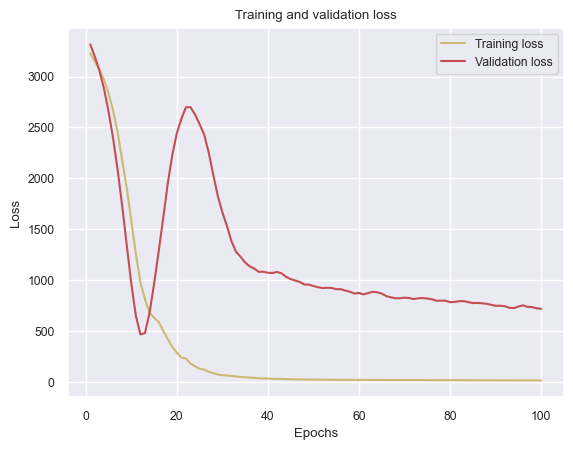

1/1 [==============================] - 0s 150ms/step - loss: 119.2637 - mae: 10.1641


In [140]:
# needs to K-fold cross-valdiation because of small dataset
# K = 5  60% train set 20% validation set 20% test set
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

lossList, maeList = list(), list()

i = 1;
for train_index, test_index in kf.split(X):
    print(f"\n[{i}th Fold progress]")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # divide train set into val and train set
    val_ratio = 0.25
    val_size = int(len(X_train) * val_ratio)

    # set indices randomly for val set
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    X_val = X_train[val_indices]
    y_val = y_train[val_indices]

    X_train = X_train[train_indices]
    y_train = y_train[train_indices]
    
    X_train, X_val, X_test = standardize(X_train, X_val, X_test)
    
    model = buildModel()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_val, y_val))
    showGraph(history)
    
    loss, mae = model.evaluate(X_test, y_test)
    lossList.append(loss)
    maeList.append(mae)
    i += 1 

In [141]:
print("Result")
print(f"mseList:{lossList}\nmaeList:{maeList}")
print(f"mse: {sum(lossList)/K}")
print(f"mae: {sum(maeList)/K}")

Result
mseList:[34.38040542602539, 79.3154296875, 319.54461669921875, 66.524169921875, 119.26373291015625]
maeList:[5.318338394165039, 6.980030059814453, 12.707039833068848, 7.526297569274902, 10.164117813110352]
mse: 123.80567092895508
mae: 8.539164733886718
